In [1]:
from skimage import measure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import sklearn
import sklearn.cluster
import itertools
import statistics
import cv2
import scipy
from scipy import signal


In [3]:
shape = cv2.imread("./shape-train/circle/circle-10.jpg")
print(shape.shape)

(224, 224, 3)


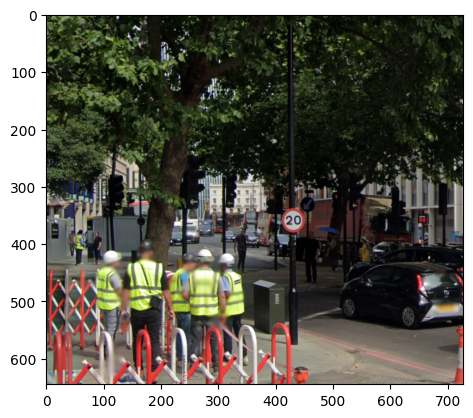

In [3]:
img_bgr = cv2.imread("./img/IMG_0108.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


plt.imshow(img_rgb)
plt.show()

In [4]:
def edge_detection(img_bgr):
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    # Apply the Sobel filters for horizontal and vertical edge detection
    sobel_x = cv2.Sobel(img[:,:,1], cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edge detection
    sobel_y = cv2.Sobel(img[:,:,1], cv2.CV_64F, 0, 1, ksize=3)  # Vertical edge detection

    # Calculate the magnitude of the gradient
    edge_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Normalize the result to an 8-bit scale
    edge_magnitude = cv2.normalize(edge_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Display the edge magnitude image
    return edge_magnitude

In [5]:
def binary_three(img_bgr):
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_red = np.array([100, 100, 100])
    upper_red = np.array([255, 255, 255])

    # Create a binary mask for the red color within the specified range
    mask = cv2.inRange(img_hsv, lower_red, upper_red)

    # Apply the mask to the original image to segment the red regions
    red_segmented = cv2.bitwise_and(img, img, mask=mask)
    _, binary_image = cv2.threshold(red_segmented, red_segmented.mean(), 255, cv2.THRESH_BINARY)
    return binary_image

In [6]:
def blur(img_bgr, kernel_size=5):
    return cv2.GaussianBlur(img_bgr, (kernel_size, kernel_size), 0)

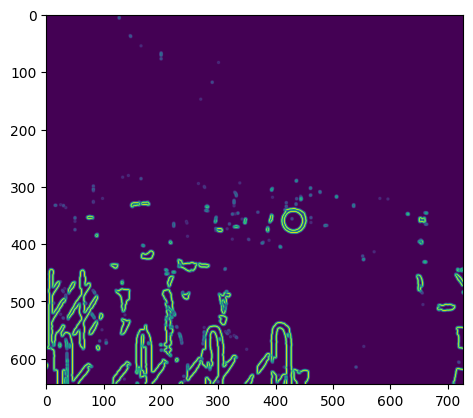

In [7]:
edged = edge_detection(blur(binary_three(img_bgr)))

plt.imshow(edged)
plt.show()

In [8]:
contours, hierachy = cv2.findContours( 
    edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [19]:
for cont in contours:
    print(cont, end="\n===\n")

[[[156 639]]

 [[155 640]]

 [[155 641]]

 [[154 642]]

 [[154 644]]

 [[163 644]]

 [[163 642]]

 [[160 639]]]
===
[[[357 625]]

 [[352 630]]

 [[352 632]]

 [[349 635]]

 [[349 636]]

 [[343 642]]

 [[343 644]]

 [[350 644]]

 [[352 642]]

 [[353 643]]

 [[353 644]]

 [[360 644]]

 [[360 643]]

 [[361 642]]

 [[361 637]]

 [[363 635]]

 [[363 627]]

 [[361 625]]]
===
[[[713 615]]

 [[712 616]]

 [[712 619]]

 [[711 620]]

 [[711 625]]

 [[710 626]]

 [[710 630]]

 [[709 631]]

 [[709 636]]

 [[707 638]]

 [[707 639]]

 [[706 640]]

 [[706 644]]

 [[713 644]]

 [[713 641]]

 [[714 640]]

 [[714 635]]

 [[715 634]]

 [[715 630]]

 [[716 629]]

 [[716 624]]

 [[717 623]]

 [[717 622]]

 [[718 621]]

 [[722 621]]

 [[723 622]]

 [[727 622]]

 [[727 617]]

 [[726 616]]

 [[722 616]]

 [[721 615]]]
===
[[[537 612]]

 [[536 613]]

 [[536 617]]

 [[537 618]]

 [[542 618]]

 [[543 617]]

 [[543 613]]

 [[542 612]]]
===
[[[  0 606]]

 [[  0 611]]

 [[  1 612]]

 [[  0 613]]

 [[  0 620]]

 [[ 

In [10]:
# Create a copy of the image to draw the contours on
contour_image = img_rgb.copy()

# Draw the contours on the copied image
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Convert the BGR image to RGB format for display with Matplotlib
contour_image_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)

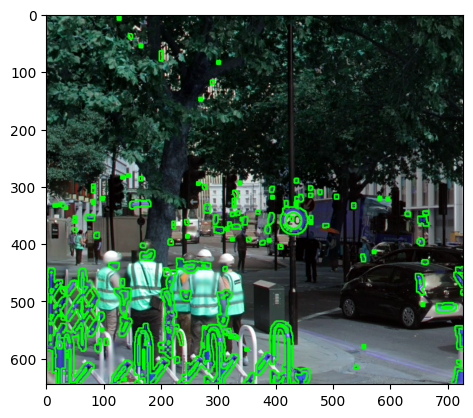

In [14]:
plt.imshow(contour_image_rgb)
plt.show()

In [8]:
print(len(contours))

245


`https://www.geeksforgeeks.org/how-to-detect-shapes-in-images-in-python-using-opencv/`

In [9]:
i = 0

# list for storing names of shapes 
for contour in contours: 

    # here we are ignoring first counter because  
    # findcontour function detects whole image as shape 
    if i == 0: 
        i = 1
        continue

    # cv2.approxPloyDP() function to approximate the shape 
    approx = cv2.approxPolyDP( 
        contour, 0.01 * cv2.arcLength(contour, True), True) 

    # using drawContours() function 
    cv2.drawContours(img_rgb, [contour], 0, (0, 0, 255), 5) 

    # finding center point of shape 
    M = cv2.moments(contour) 
    if M['m00'] != 0.0: 
        x = int(M['m10']/M['m00']) 
        y = int(M['m01']/M['m00']) 

    # putting shape name at center of each shape 
    if len(approx) == 3: 
        cv2.putText(img_rgb, 'Triangle', (x, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 

    elif len(approx) == 4: 
        cv2.putText(img_rgb, 'Quadrilateral', (x, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 

    elif len(approx) == 5: 
        cv2.putText(img_rgb, 'Pentagon', (x, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 

    elif len(approx) == 6: 
        cv2.putText(img_rgb, 'Hexagon', (x, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 

    else: 
        cv2.putText(img_rgb, 'circle', (x, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 

# displaying the image after drawing contours 
cv2.imshow('shapes', img_rgb)

: 

In [37]:
def filter_c(contours, image):
    height, width = image.shape[:2]

    image_area = width * height

    n_list = []

    for cont in contours:

        if len(cont) < 6:
            continue

        ellipse = cv2.fitEllipse(cont)
        c_area = cv2.contourArea(cont)

        # Extract the major and minor axes of the fitted ellipse
        major_axis, minor_axis = ellipse[1]

        # Calculate the aspect ratio (ratio of major axis to minor axis)
        ratio = major_axis / minor_axis

        if(c_area > 6**2 and c_area > image_area*.001 and 0.5 < ratio < 2):
            n_list.append(cont)
    return n_list

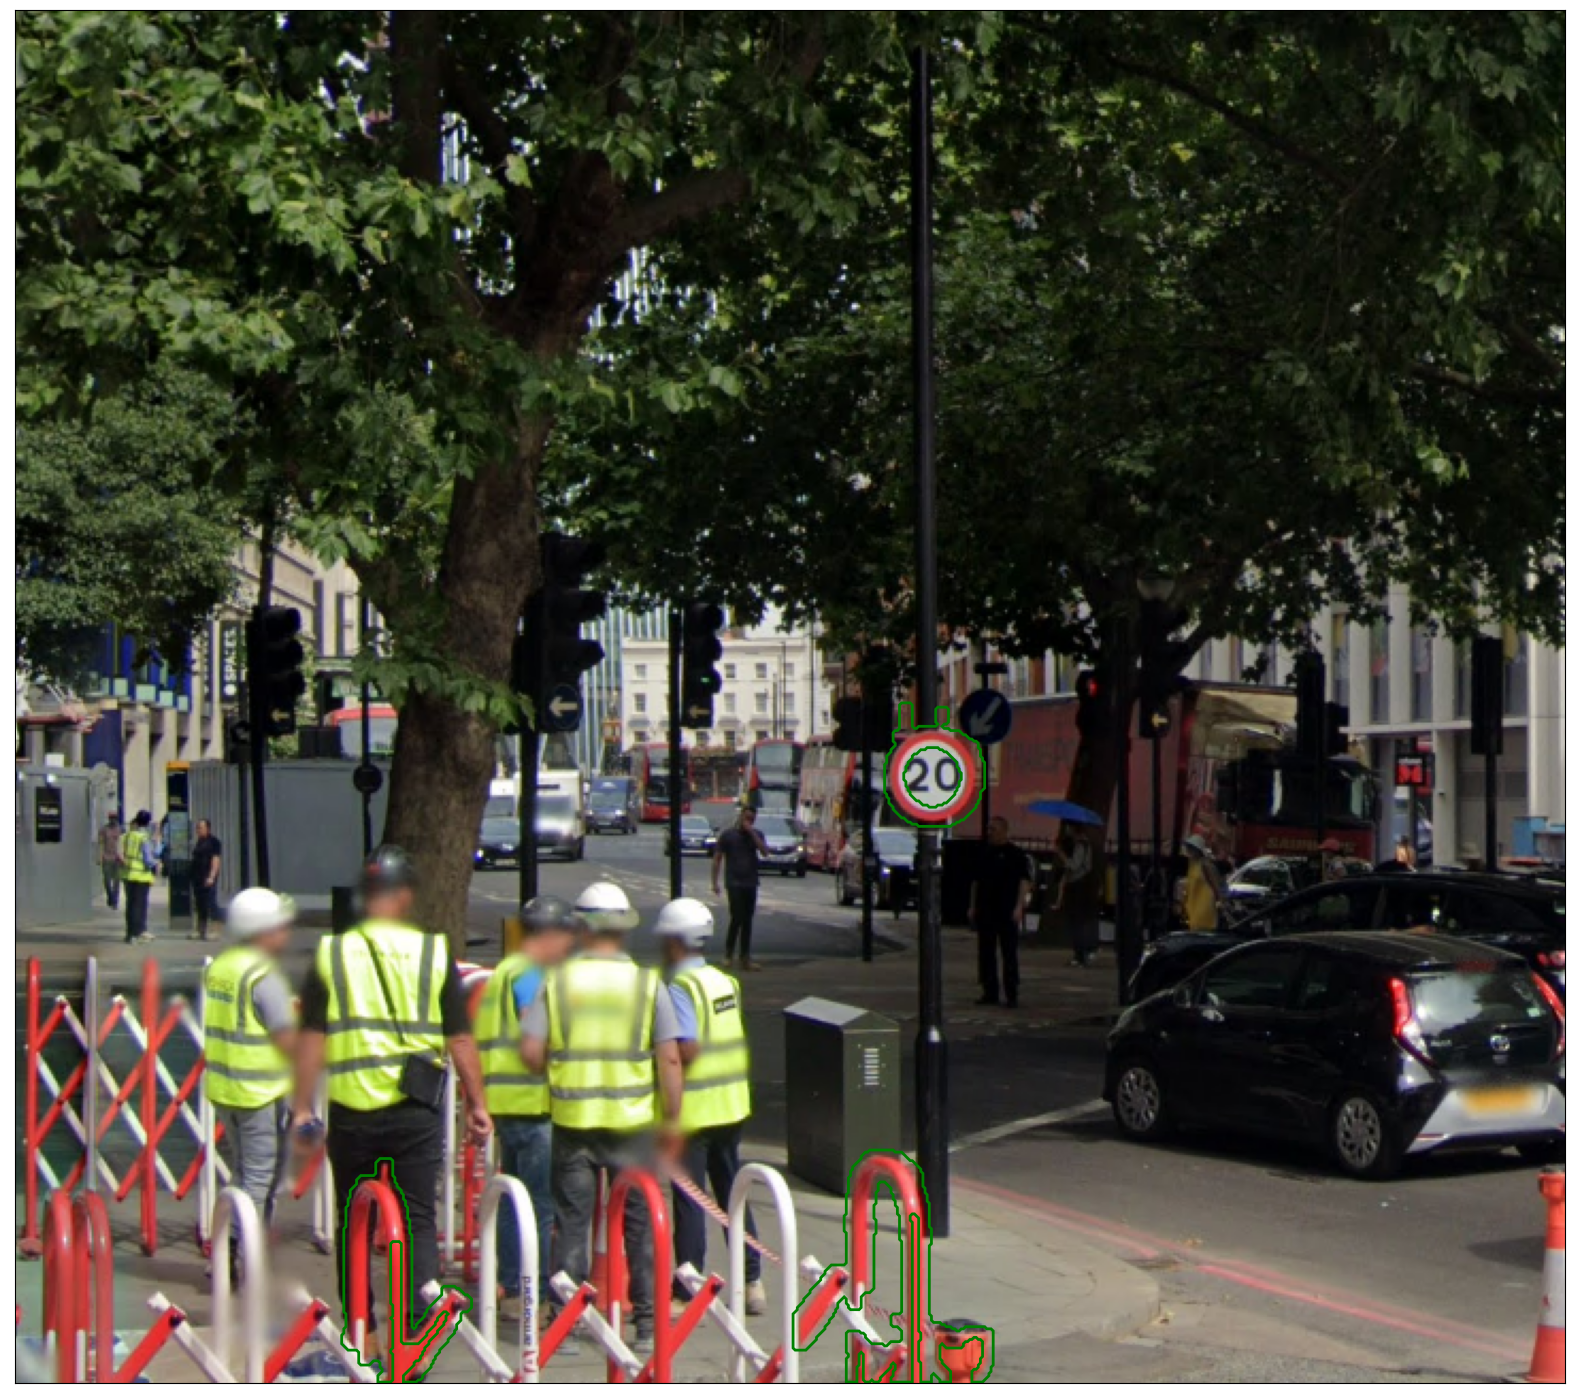

In [38]:
_, (ax1) = plt.subplots(1,figsize=(20,20))
plt.xticks([]),plt.yticks([])
ax1.imshow(img_rgb);

for cont in filter_c(contours, img_rgb):

    ax1.add_patch(matplotlib.patches.Polygon(cont[:, 0, :], edgecolor="green", linewidth=2, fill=False))
plt.show()